Block 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files.upload() # upload messed_up_iris.xlsx

Saving messed_up_iris.xlsx to messed_up_iris (5).xlsx


{'messed_up_iris.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00B;>\xc9\\\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Block 2: Load the data and make sure there are no extra index columns. Show the shape of the data AND the head of the data

In [2]:
# load data
# make index_col = 0 to get rid of extra index column
data = pd.read_excel('messed_up_iris.xlsx', index_col=0)

# data shape
print('------------ 2a ------------')
print('data shape:', data.shape)

# data head
print()
print('------------ 2b ------------')
print(data.head())

------------ 2a ------------
data shape: (150, 7)

------------ 2b ------------
   sepal_length  sepal_width  petal_length  petal_width species   color  origin
0           5.1          3.5           1.4          0.2  setosa   green     usa
1           4.9          3.0           1.4          0.2  setosa  yellow     usa
2           4.7          3.2           1.3          0.2  setosa   green     usa
3           4.6          3.1           1.5          0.2  setosa  orange   japan
4           5.0          3.6           1.4          0.2  setosa    blue  europe


Block 3: Remove columns and rows where there are more than 50% of the data missing. Show the shape of the data after you have removed those columns/rows

In [3]:
# find out which columns and rows have more than 50% missing data
print('------------ 3a ------------')
print(data.info())

# drop color column since more than 50% of that column is missing data
data2 = data.drop(['color'], axis= 1)

# drop rows with all NaNs since more than 50% of those rows are missing data
data2 = data2.dropna(how= 'all')

# data head
print()
print('------------ 3b ------------')
print(data2.head())

# data shape
print()
print('------------ 3c ------------')
print('data2 shape:', data2.shape)

------------ 3a ------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  137 non-null    float64
 1   sepal_width   138 non-null    float64
 2   petal_length  137 non-null    float64
 3   petal_width   143 non-null    float64
 4   species       145 non-null    object 
 5   color         73 non-null     object 
 6   origin        145 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.4+ KB
None

------------ 3b ------------
   sepal_length  sepal_width  petal_length  petal_width species  origin
0           5.1          3.5           1.4          0.2  setosa     usa
1           4.9          3.0           1.4          0.2  setosa     usa
2           4.7          3.2           1.3          0.2  setosa     usa
3           4.6          3.1           1.5          0.2  setosa   japan
4           5.0          3.6     

Block 4: Remove duplicate data, if there is any. Show the shape of the data

In [4]:
# check if there are duplicates
print('------------ 4a ------------')
print(data2.duplicated().any())

# show which ones are duplicates
print()
print('------------ 4b ------------')
print(data2[data2.duplicated(keep=False)]) # i did keep=False to be able to see all the duplicates in the ouput

# remove duplicates
data_no_duplicates = data2.drop_duplicates(ignore_index= True)

# check if all duplicates are gone
print()
print('------------ 4c ------------')
print(data_no_duplicates.duplicated().any())

# data shape
print()
print('------------ 4d ------------')
print('data_no_duplicates shape:', data_no_duplicates.shape)

------------ 4a ------------
True

------------ 4b ------------
    sepal_length  sepal_width  petal_length  petal_width species  origin
21           5.1          3.7           1.5          0.4  setosa  europe
34           5.1          3.7           1.5          0.4  setosa  europe
37           4.9          3.6           1.4          0.1  setosa   japan
42           5.1          3.7           1.5          0.4  setosa  europe
59           4.9          3.6           1.4          0.1  setosa   japan
71           4.9         36.0           1.4          0.1  setosa   japan
82           4.9         36.0           1.4          0.1  setosa   japan
87           4.9          3.6           1.4          0.1  setosa   japan

------------ 4c ------------
False

------------ 4d ------------
data_no_duplicates shape: (140, 6)


Block 5: Dummy code the categorical data. Show the head of the data

In [5]:
# look at value counts for species and origins to see the different labels used for each

print('------------ 5a ------------')
print(data_no_duplicates['species'].value_counts())
print()
print('------------ 5b ------------')
print(data_no_duplicates['origin'].value_counts())

# some species and origin names are misspelled - change them to correct name and put their data in the correct column

data_no_duplicates['species'] = np.where(data_no_duplicates['species'] == 'seotsa', 'setosa', data_no_duplicates['species'])
data_no_duplicates['species'] = np.where(data_no_duplicates['species'] == 'west virginia', 'virginica', data_no_duplicates['species'])
data_no_duplicates['species'] = np.where(data_no_duplicates['species'] == 'versicolr', 'versicolor', data_no_duplicates['species'])
data_no_duplicates['species'] = np.where(data_no_duplicates['species'] == 'virginia', 'virginica', data_no_duplicates['species'])

data_no_duplicates['origin'] = np.where(data_no_duplicates['origin'] == 'uas', 'usa', data_no_duplicates['origin'])
data_no_duplicates['origin'] = np.where(data_no_duplicates['origin'] == 'euarope', 'europe', data_no_duplicates['origin'])

# recheck value counts to make sure species and origin names are all correct
print()
print('------------ 5c ------------')
print(data_no_duplicates['species'].value_counts())
print()
print('------------ 5d ------------')
print(data_no_duplicates['origin'].value_counts())

# dummy code species column
species_df = pd.get_dummies(data_no_duplicates['species'])
print()
print('------------ 5e ------------')
print(species_df.head(10))

# dummy code origin column
origin_df = pd.get_dummies(data_no_duplicates['origin']) # dropfirst=True
print()
print('------------ 5f ------------')
print(origin_df.head(10))

------------ 5a ------------
virginica        47
setosa           46
versicolor       42
seotsa            2
virginia          1
west virginia     1
versicolr         1
Name: species, dtype: int64

------------ 5b ------------
usa        49
europe     46
japan      42
uas         2
euarope     1
Name: origin, dtype: int64

------------ 5c ------------
virginica     49
setosa        48
versicolor    43
Name: species, dtype: int64

------------ 5d ------------
usa       51
europe    47
japan     42
Name: origin, dtype: int64

------------ 5e ------------
   setosa  versicolor  virginica
0       1           0          0
1       1           0          0
2       1           0          0
3       1           0          0
4       1           0          0
5       1           0          0
6       1           0          0
7       1           0          0
8       1           0          0
9       1           0          0

------------ 5f ------------
   europe  japan  usa
0       0      0    1
1   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Block 6: Drop the redundant columns from the dataframe so that you are left with just the dummy coded columns. Show the head of the data

In [6]:
combined_df = pd.concat([species_df, origin_df], axis= 1) # combine dummy coded columns
data_no_duplicates = data_no_duplicates.drop(['species', 'origin'], axis= 1) # drop species and origin columns, will combine this with the dummy coded columns later

print('------------ 6a ------------')
print(combined_df.head())
print()
print('------------ 6b ------------')
print(data_no_duplicates.head())

------------ 6a ------------
   setosa  versicolor  virginica  europe  japan  usa
0       1           0          0       0      0    1
1       1           0          0       0      0    1
2       1           0          0       0      0    1
3       1           0          0       0      1    0
4       1           0          0       1      0    0

------------ 6b ------------
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Block 7: Remove outliers above 2 standard deviations.

------------ 7a ------------
       sepal_length  sepal_width  petal_length  petal_width
count    132.000000   133.000000    132.000000   138.000000
mean       7.609848     3.309023      5.046970     1.708696
std       10.031552     2.890225      8.863705     3.533107
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.850000     3.000000      4.400000     1.350000
75%        6.500000     3.400000      5.200000     1.875000
max       77.000000    36.000000     67.000000    30.000000

------------ 7b ------------
       sepal_length  sepal_width  petal_length  petal_width
count    121.000000   122.000000    121.000000   127.000000
mean       5.861157     3.054918      3.752893     1.201575
std        0.803158     0.450913      1.754474     0.768113
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.800000     3.000000      4.4

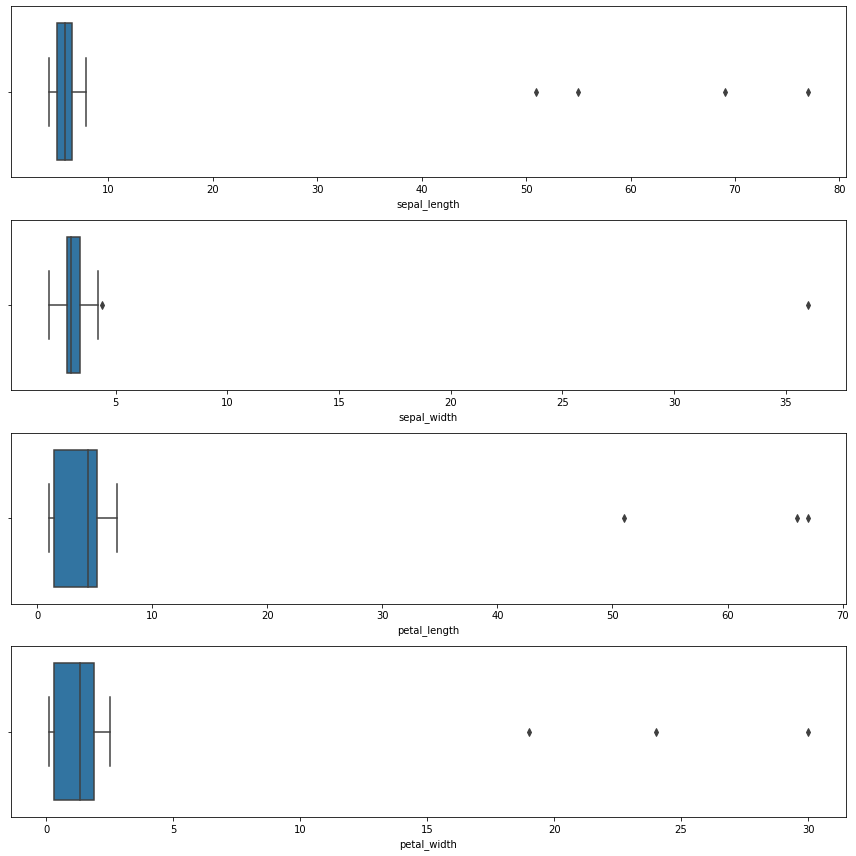

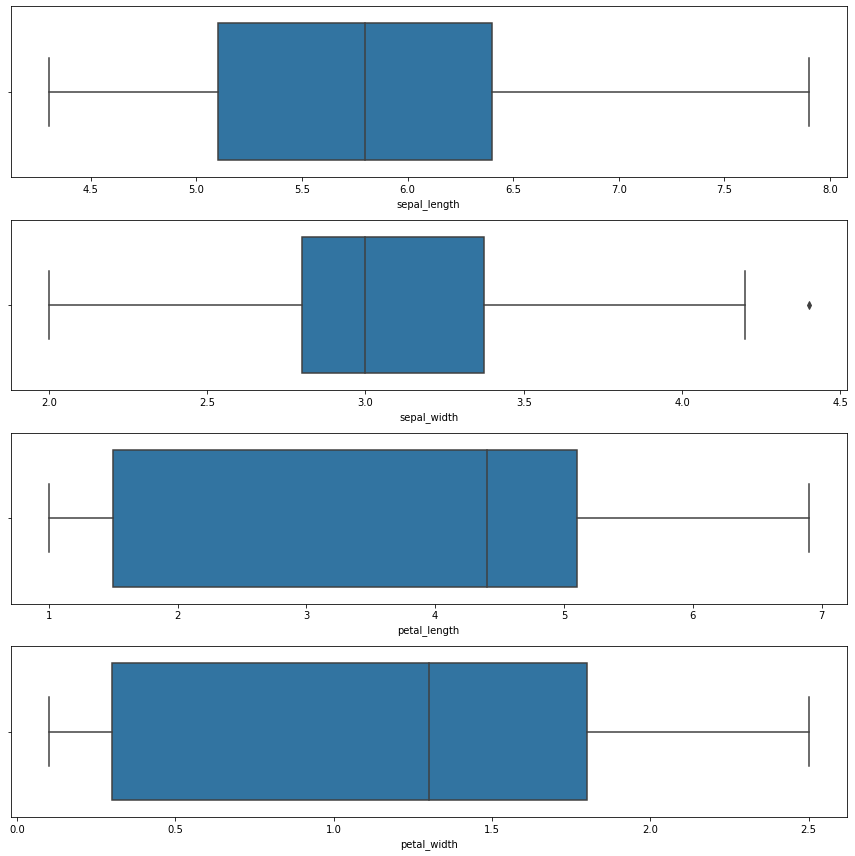

In [7]:
print('------------ 7a ------------')
print(data_no_duplicates.describe()) # show data information with outliers first

# find outliers using boxplots
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

count = 0
for column in data_no_duplicates.columns:
  if isinstance(data_no_duplicates[column][0], float) == 1:

    sns.boxplot(x = data_no_duplicates[column], ax=axes[count])

    count += 1 # add 1 to count every time we go through this and it works

plt.tight_layout()

# remove outliers above 2 stds
data_mean = data_no_duplicates.mean()
data_std = data_no_duplicates.std()
lower = data_mean - (data_std * 2)
upper = data_mean + (data_std * 2)
data_no_outliers = data_no_duplicates[~((data_no_duplicates < lower) | (data_no_duplicates > upper)).any(axis=1)]

print()
print('------------ 7b ------------')
print(data_no_outliers.describe()) # can compare to before, see data with outliers removed

# check that outliers are removed with boxplots again
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

count = 0
for column in data_no_outliers.columns:
  if isinstance(data_no_outliers[column][0], float) == 1:

    sns.boxplot(x = data_no_outliers[column], ax=axes[count])

    count += 1

print()
print('------------ 7c ------------')
plt.tight_layout() # shows the original boxplots and then the new ones together

Block 8: For the remaining missing data, replace with the median value. Or Bonus 0.5 points – Instead of replacing the missing data with the overall median value, replace them with the median value with respect to species. In other words, in the first row, if petal length is missing, then replace that petal length value with the median petal length value for the species setosa.

In [8]:
# combine the dataframes all together before filling missing data
new_data = pd.concat([data_no_outliers, combined_df],axis=1)
pd.set_option('display.max_columns', None)

print('------------ 8a ------------')
print(new_data.head(10)) # check that the df has all the correct columns

# fill missing data with median values
new_data['sepal_length'].fillna(value=new_data['sepal_length'].median(), inplace=True)
new_data['sepal_width'].fillna(value=new_data['sepal_length'].median(), inplace=True)
new_data['petal_length'].fillna(value=new_data['petal_length'].median(), inplace=True)
new_data['petal_width'].fillna(value=new_data['petal_width'].median(), inplace=True)

# check if all NaNs are filled
print()
print('------------ 8b ------------')
print(new_data.info())

------------ 8a ------------
   sepal_length  sepal_width  petal_length  petal_width  setosa  versicolor  \
0           5.1          3.5           1.4          0.2       1           0   
1           4.9          3.0           1.4          0.2       1           0   
2           4.7          3.2           1.3          0.2       1           0   
3           4.6          3.1           1.5          0.2       1           0   
4           5.0          3.6           1.4          0.2       1           0   
5           5.4          3.9           1.7          0.4       1           0   
6           NaN          NaN           NaN          NaN       1           0   
7           5.0          NaN           1.5          0.2       1           0   
8           4.4          2.9           1.4          0.2       1           0   
9           4.9          3.1           1.5          0.1       1           0   

   virginica  europe  japan  usa  
0          0       0      0    1  
1          0       0      0    

Block 9: Bonus 0.5 points – Bin or bucket the petal width column into low, medium, and high depending on the following bins = 0 to 0.9, 0.9 to 1.8, 1.8 to 2.7. These should not be dummy coded, but instead, you should have one column with petal_width as 1 for 0 to 0.9, 2 for 0.9 to 1.8, and 3 for 1.8 to 2.7.

In [9]:
# bin values into low, medium, and high
# create column with 1 for 0 to 0.9 (low), 2 for 0.9 to 1.8 (medium), and 3 for 1.8 to 2.7 (high)
petal_width_ordinal = []

for i in range(len(new_data['petal_width'])):

  if (new_data['petal_width'][i] >= 0) and (new_data['petal_width'][i] < 0.9): # low petal width (0 to 0.9)
    petal_width_ordinal.append(1)

  elif (new_data['petal_width'][i] >= 0.9) and (new_data['petal_width'][i] < 1.8): # medium petal width (0.9 to 1.8)
    petal_width_ordinal.append(2)

  elif (new_data['petal_width'][i] >= 1.8) and (new_data['petal_width'][i] <= 2.7): # high petal width (1.8 to 2.7)
    petal_width_ordinal.append(3)

# can only run once since it doesn't overwrite
new_data.insert(len(new_data.columns), 'petal_width_ordinal', petal_width_ordinal)
new_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,europe,japan,usa,petal_width_ordinal
0,5.1,3.5,1.4,0.2,1,0,0,0,0,1,1
1,4.9,3.0,1.4,0.2,1,0,0,0,0,1,1
2,4.7,3.2,1.3,0.2,1,0,0,0,0,1,1
3,4.6,3.1,1.5,0.2,1,0,0,0,1,0,1
4,5.0,3.6,1.4,0.2,1,0,0,1,0,0,1
5,5.4,3.9,1.7,0.4,1,0,0,1,0,0,1
6,5.8,5.8,4.4,1.3,1,0,0,1,0,0,2
7,5.0,5.8,1.5,0.2,1,0,0,1,0,0,1
8,4.4,2.9,1.4,0.2,1,0,0,0,0,1,1
9,4.9,3.1,1.5,0.1,1,0,0,0,1,0,1


Block 10: Show (i.e., print) that there are no missing data and also use the describe method to show off the final dataset.

In [11]:
# show that there is no missing data
print('------------ 10a ------------')
print(new_data.info())

# describe to show final dataset
print()
print('------------ 10b ------------')
print(new_data.describe())

------------ 10a ------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal_length         140 non-null    float64
 1   sepal_width          140 non-null    float64
 2   petal_length         140 non-null    float64
 3   petal_width          140 non-null    float64
 4   setosa               140 non-null    uint8  
 5   versicolor           140 non-null    uint8  
 6   virginica            140 non-null    uint8  
 7   europe               140 non-null    uint8  
 8   japan                140 non-null    uint8  
 9   usa                  140 non-null    uint8  
 10  petal_width_ordinal  140 non-null    int64  
dtypes: float64(4), int64(1), uint8(6)
memory usage: 12.4 KB
None

------------ 10b ------------
       sepal_length  sepal_width  petal_length  petal_width      setosa  \
count    140.000000   140.000000    140.000